# Solving Non Linear Systems using Newton's Method

We'll be finding the roots of the following system of equations: 

$f(\bar{v},\theta)$  =  0.5$\bar{v}^{2}$  + $\sin(\theta)$ = 0

$g(\bar{v},\theta)$ =  0.5$\bar{v}^{2}$  - $\cos(\theta)$ = 0

In [7]:
from numpy.linalg import inv
import numpy as np
import math

In [1]:
def f(v_bar, theta):
    return 0.5*(v_bar**2) + math.sin(theta)

def g(v_bar, theta):
    return 0.5*(v_bar**2) - math.cos(theta)

The Jacobian Matrix is calculated as follows: 
\begin{equation}
J = 
\begin{bmatrix}
\frac{df(\bar{v},\theta)}{d\bar{v}} & \frac{df(\bar{v},\theta)}{d\theta} 
ewline \\
 \frac{dg(\bar{v},\theta)}{d\bar{v}} & \frac{dg(\bar{v},\theta)}{d\theta}  \   \\
 \end{bmatrix}
\end{equation}

In [3]:
def jacobian(v_bar,theta):
    array = np.array([[v_bar, math.cos(theta)],[v_bar, math.sin(theta)]])
    return array

Assuming the initial point as 
\begin{equation}
x_{0} = 
\begin{bmatrix}
0 \\
0 \\
\end{bmatrix}
\end{equation}

And the reiterating solution as
\begin{equation}
x_{n} = 
\begin{bmatrix}
\bar{v}_{n} \\
\theta_{n} \\
\end{bmatrix}
\end{equation}

The next point is \begin{equation}
x_{n+1} = 
x_{n} - J(\bar{v}_{n},\theta_{n})^{-1}F(\bar{v}_{n},\theta_{n})
\end{equation}

where \begin{equation}
F(\bar{v}_{n},\theta_{n}) = 
\begin{bmatrix}
f(\bar{v}_{n},\theta_{n}) \\
g(\bar{v}_{n},\theta_{n}) \\
\end{bmatrix}
\end{equation}

In [4]:
def next_x(old_x):
    
    inverse_jacobian = inv(jacobian(old_x[0][0],old_x[1][0]))
    F = np.array([[f(old_x[0][0],old_x[1][0])],[g(old_x[0][0],old_x[1][0])]])
    
    next_x = old_x - np.matmul(inverse_jacobian,F)
    return next_x

Running 10 iterations of the algorithm

In [8]:
all_x = []

x = np.array([[1],[0]])
all_x.append(x)

for _ in range(10):
    x = next_x(x)
    all_x.append(x)

In [9]:
final_x = np.array(all_x).reshape(11,2)

In [14]:
print('Final Solution:',all_x[10][0][0],',',all_x[10][1][0])

Final Solution: 1.189207115002721 , -0.7853981633974483


# Visualizing the convergence of the solution to the true solution

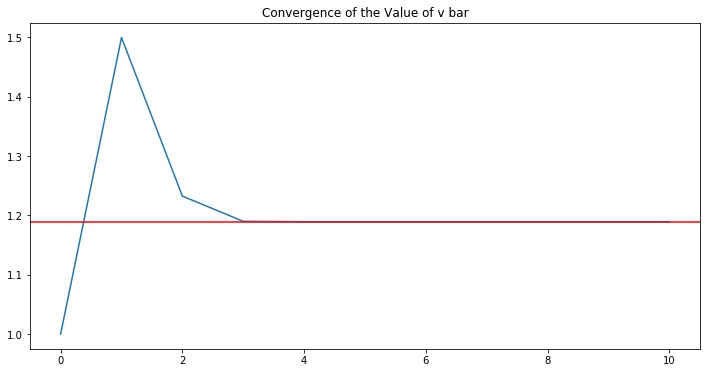

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(range(11),final_x[:,0])
plt.title('Convergence of the Value of v bar')
plt.axhline(1.18920712, color='red')
plt.show()

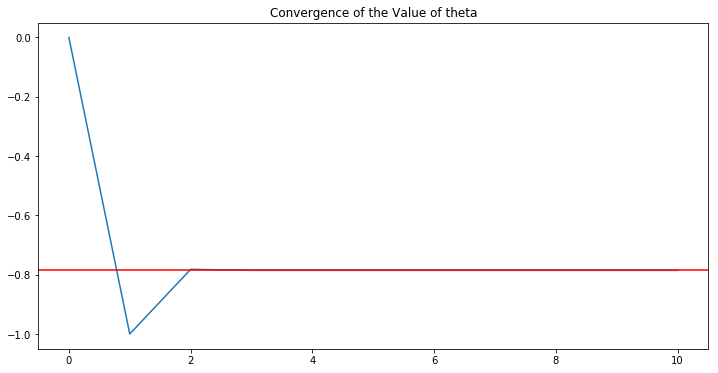

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(range(11),final_x[:,1])
plt.title('Convergence of the Value of theta')
plt.axhline(-0.78539816, color='red')
plt.show()